In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [3]:
ds=pd.read_csv('cardata.csv')

In [4]:
ds

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
ds.shape

(301, 9)

In [6]:
ds.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
ds.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<AxesSubplot:xlabel='Driven_kms'>

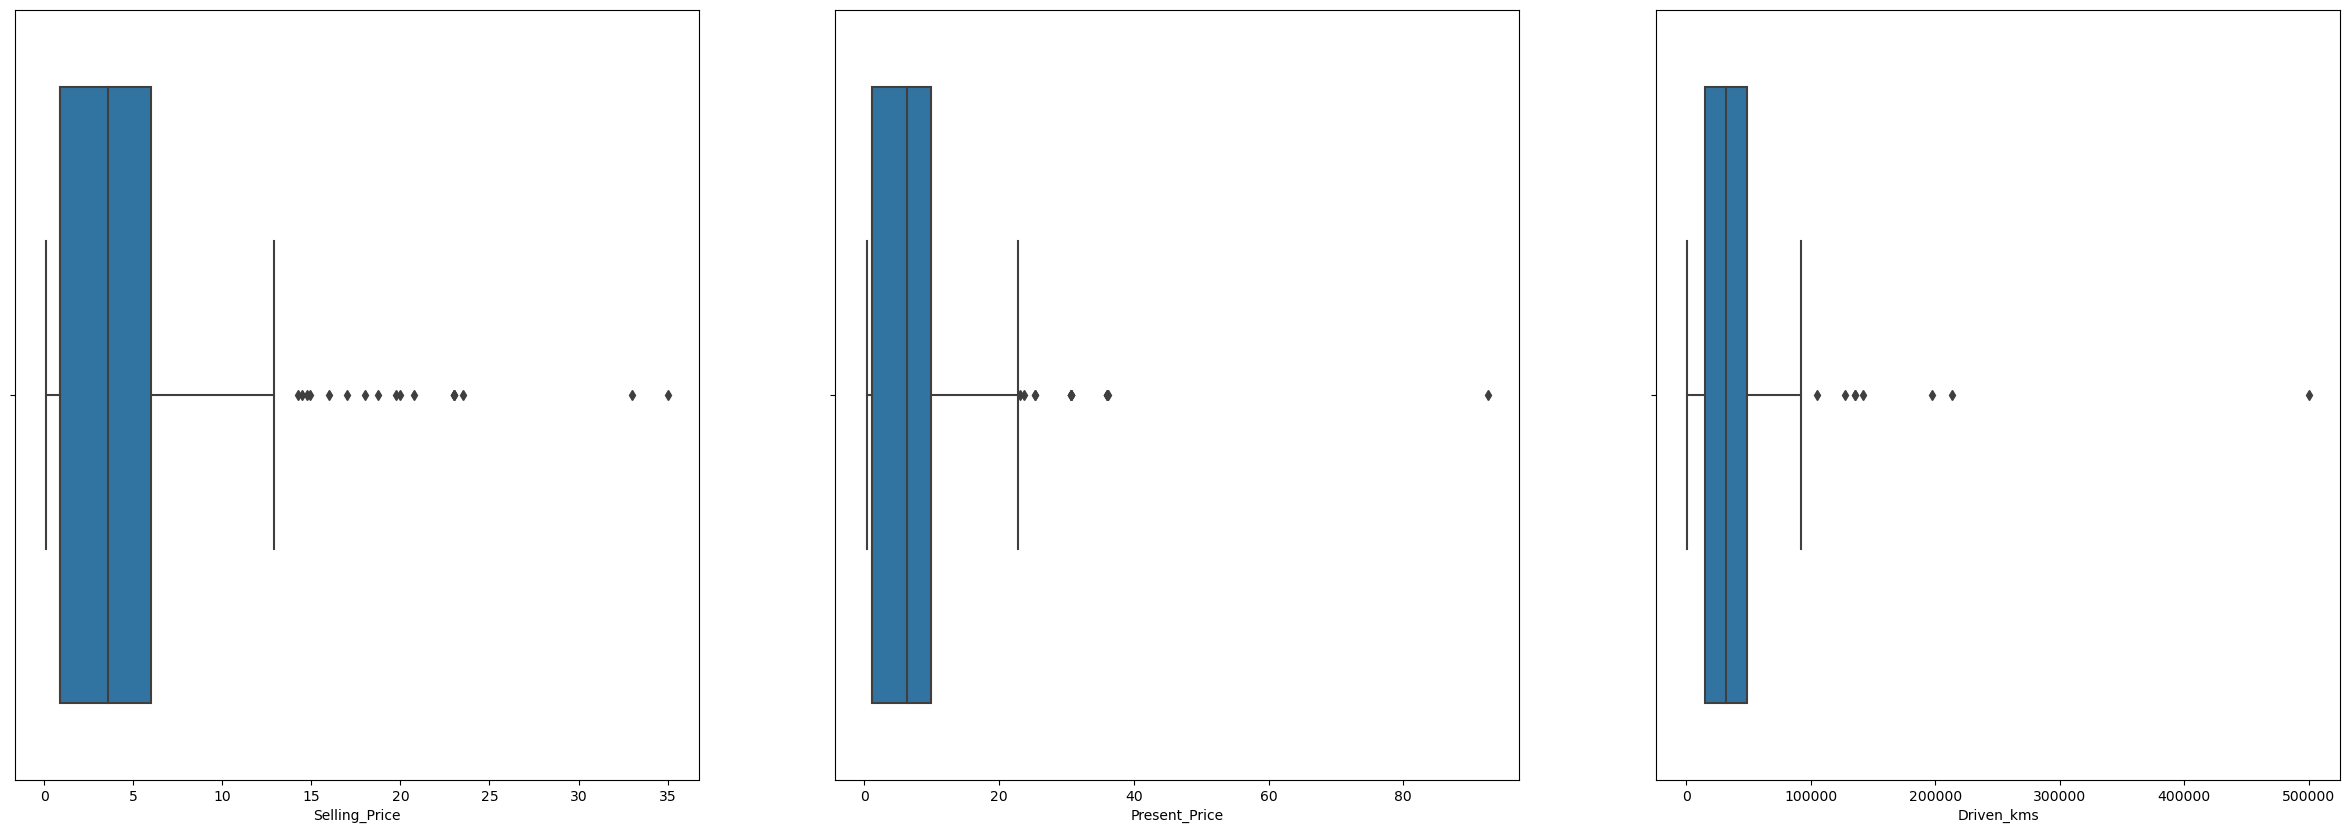

In [9]:
fig, ax = plt.subplots(1, 3,figsize=(30, 10) )
sns.boxplot(ax = ax[0], x = ds['Selling_Price'])
sns.boxplot(ax = ax[1], x = ds['Present_Price'])
sns.boxplot(ax = ax[2], x = ds['Driven_kms'])

Selling_Price
2.480979484005291


c:\Users\prasad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


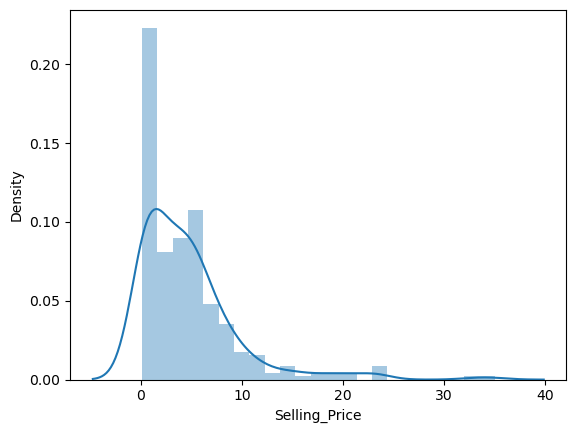

Present_Price
4.065021455029187


c:\Users\prasad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


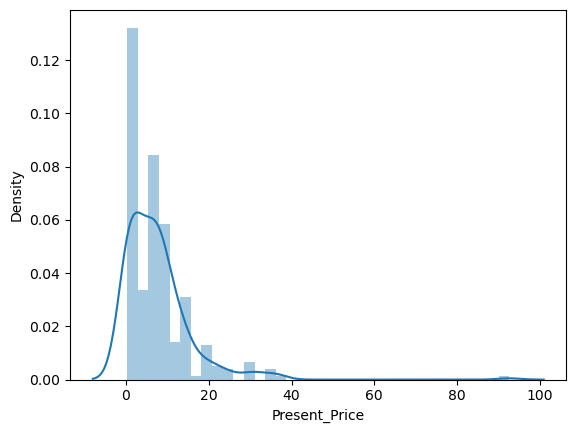

Driven_kms
6.403895025283172


c:\Users\prasad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


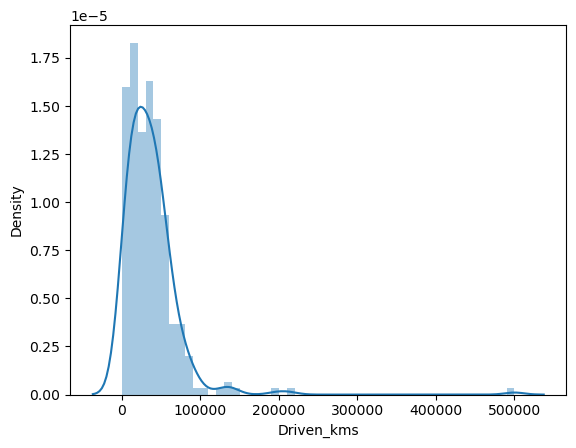

In [10]:
from scipy.stats import skew
ds_count= ds[['Selling_Price', 'Present_Price', 'Driven_kms']]

for col in ds_count: 
    print(col)
    print(skew(ds_count[col]))
    
    plt.figure()
    sns.distplot(ds_count[col])
    plt.show()

In [11]:
print(ds.Fuel_Type.value_counts())
print(ds.Selling_type.value_counts())
print(ds.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [12]:
# encoding 
ds.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
ds.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
ds.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [13]:
ds

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [14]:
u = ds.drop(['Car_Name','Selling_Price'],axis=1)
v = ds['Selling_Price']

In [16]:
print(u)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [17]:
print(v)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(u, v, test_size = 0.1, random_state=2)

In [19]:
print(X_train)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
204  2015          4.430       28282          0             0             0   
249  2016          7.600       17000          0             0             0   
277  2015         13.600       21780          0             0             0   
194  2008          0.787       50000          0             1             0   
244  2013          9.400       49000          1             0             0   
..    ...            ...         ...        ...           ...           ...   
75   2015          6.800       36000          0             0             0   
22   2011          8.010       50000          0             0             1   
72   2013         18.610       56001          0             0             0   
15   2016         10.790       43000          1             0             0   
168  2013          0.730       12000          0             1             0   

     Owner  
204      0  
249      0  
277      0  

In [20]:
print(X_test)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
99   2010         20.450       50024          1             0             0   
161  2014          0.826       23000          0             1             0   
89   2014          6.760       40000          0             0             0   
30   2012          5.980       51439          1             0             0   
232  2015         14.790       12900          0             0             1   
290  2014          6.400       19000          0             0             0   
35   2011          7.740       49998          2             0             0   
7    2015          8.610       33429          1             0             0   
183  2013          0.470       21000          0             1             0   
13   2015          7.710       26000          0             0             0   
269  2015         10.000       18828          0             0             0   
65   2014          6.950       45000          1     

In [21]:
print(Y_train)

204    2.75
249    5.25
277    9.70
194    0.20
244    5.95
       ... 
75     3.95
22     4.40
72     7.45
15     7.75
168    0.42
Name: Selling_Price, Length: 270, dtype: float64


In [22]:
print(Y_test)

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64


In [23]:
#linear_regression
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [24]:
training_data_prediction = lin_reg_model.predict(X_train)

In [25]:
from sklearn import metrics
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8796483009370212


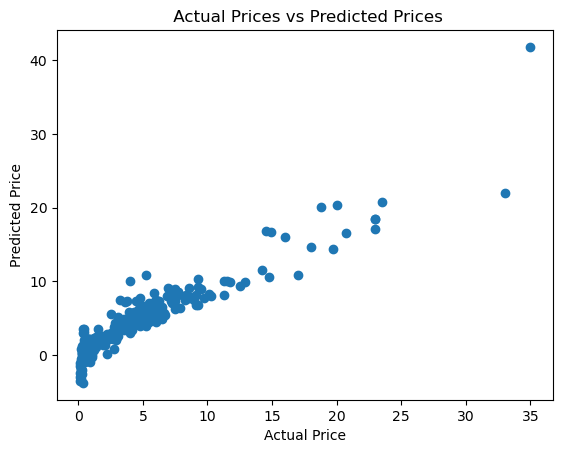

In [26]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [27]:
test_data_prediction = lin_reg_model.predict(X_test)

error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365861023208362


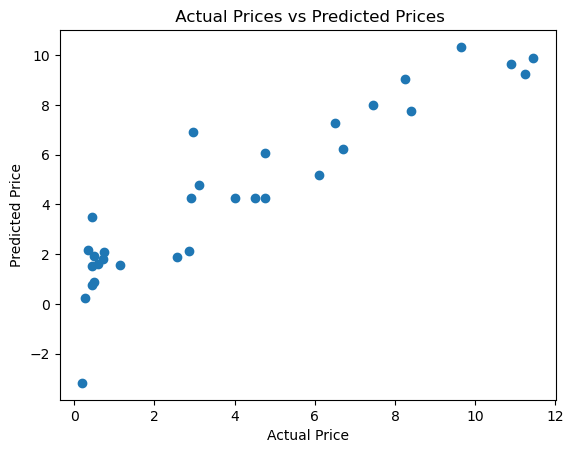

In [28]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [29]:
from sklearn.metrics import r2_score
print('Test data:',r2_score(Y_test, test_data_prediction))
print('Train data:',r2_score(Y_train, training_data_prediction))

Test data: 0.8365861023208362
Train data: 0.8796483009370212


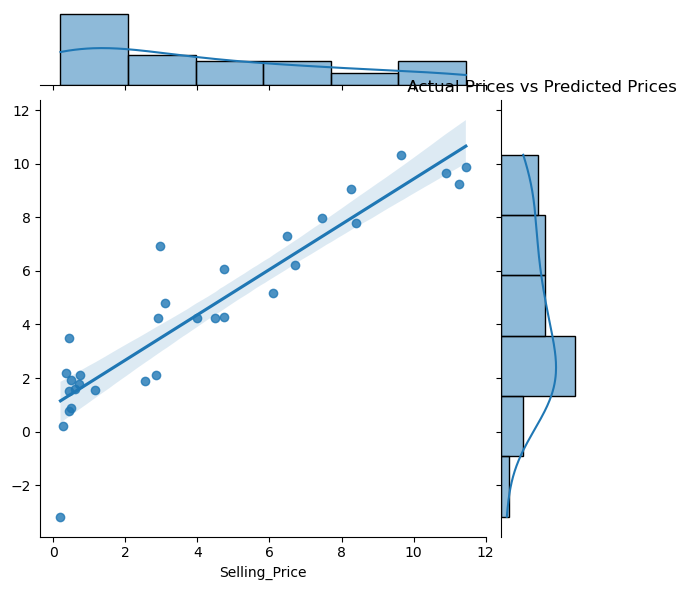

In [30]:
sns.jointplot(x = Y_test, y = test_data_prediction, kind = 'reg')
plt.xlabel("Present Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()